In [2]:
import pandas as pd

FILE = r'C:\Users\PC\Downloads\ab_data.csv'
df = pd.read_csv(FILE)

In [9]:
import matplotlib.pyplot as plt

In [3]:
df.head()

,Weight,Length,Species
0,242,25.4,A
1,290,26.3,A
2,340,26.5,A
3,363,29.0,A
4,430,29.0,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   55 non-null     int64  
 1   Length   55 non-null     float64
 2   Species  55 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [5]:
df.Species.unique()

array(['A', 'B'], dtype=object)

In [8]:
df.Weight.value_counts().sort_index()

0       1
40      1
69      1
78      1
87      1
110     1
120     2
140     1
145     1
150     1
160     2
161     1
169     1
180     1
200     1
242     1
272     1
290     2
340     2
363     1
390     2
430     1
450     2
475     1
500     4
575     1
600     2
610     1
620     1
650     1
680     1
685     1
700     3
714     1
720     1
725     1
850     1
920     1
925     1
950     1
955     1
975     1
1000    1
Name: Weight, dtype: int64

(array([1., 1., 3., 3., 6., 2., 1., 1., 3., 0., 3., 2., 1., 2., 5., 0., 0.,
        1., 4., 1., 2., 6., 0., 0., 0., 1., 0., 2., 2., 2.]),
 array([   0.        ,   33.33333333,   66.66666667,  100.        ,
         133.33333333,  166.66666667,  200.        ,  233.33333333,
         266.66666667,  300.        ,  333.33333333,  366.66666667,
         400.        ,  433.33333333,  466.66666667,  500.        ,
         533.33333333,  566.66666667,  600.        ,  633.33333333,
         666.66666667,  700.        ,  733.33333333,  766.66666667,
         800.        ,  833.33333333,  866.66666667,  900.        ,
         933.33333333,  966.66666667, 1000.        ]),
 <BarContainer object of 30 artists>)

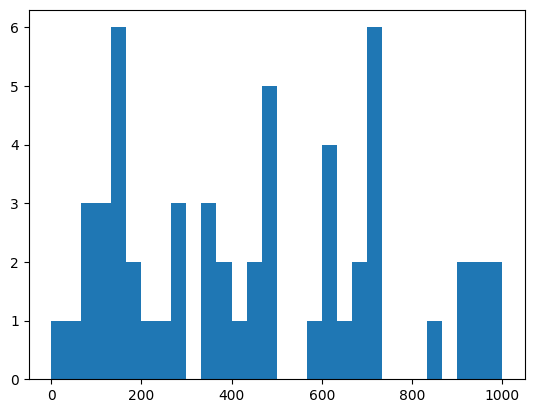

In [12]:
plt.hist(df.Weight,bins=30)

(array([1., 0., 0., 0., 1., 1., 2., 3., 2., 3., 2., 1., 2., 3., 1., 0., 2.,
        4., 3., 5., 0., 4., 3., 4., 2., 1., 0., 2., 1., 2.]),
 array([14.1       , 14.99666667, 15.89333333, 16.79      , 17.68666667,
        18.58333333, 19.48      , 20.37666667, 21.27333333, 22.17      ,
        23.06666667, 23.96333333, 24.86      , 25.75666667, 26.65333333,
        27.55      , 28.44666667, 29.34333333, 30.24      , 31.13666667,
        32.03333333, 32.93      , 33.82666667, 34.72333333, 35.62      ,
        36.51666667, 37.41333333, 38.31      , 39.20666667, 40.10333333,
        41.        ]),
 <BarContainer object of 30 artists>)

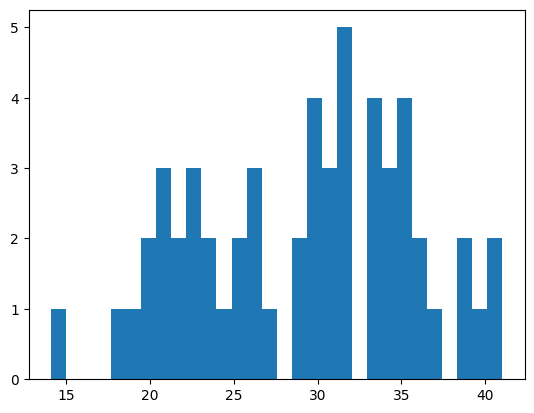

In [13]:
plt.hist(df.Length,bins=30)

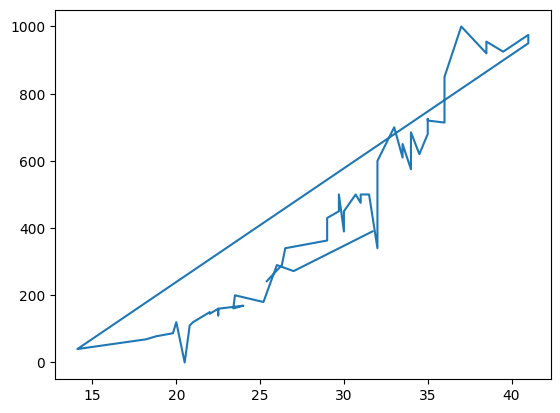

In [14]:
plt.plot(df.Length,df.Weight)

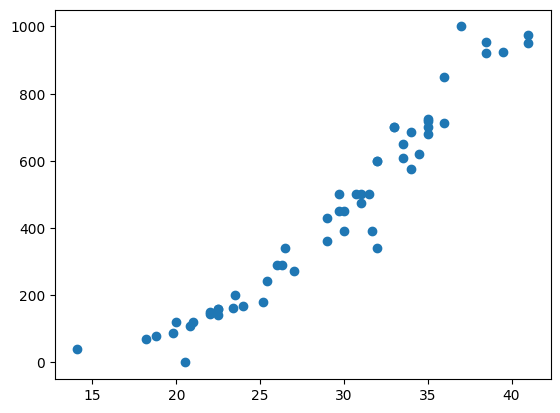

In [18]:
plt.scatter(df.Length,df.Weight)

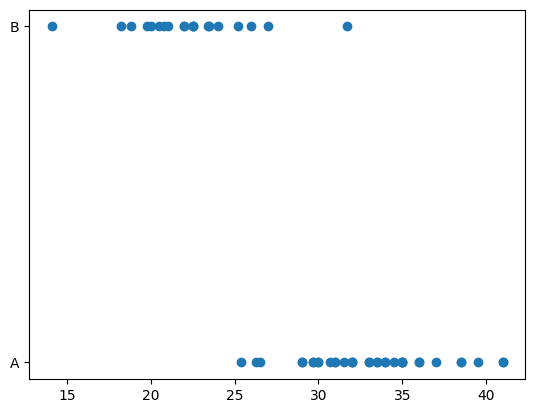

In [19]:
plt.scatter(df.Length,df.Species)

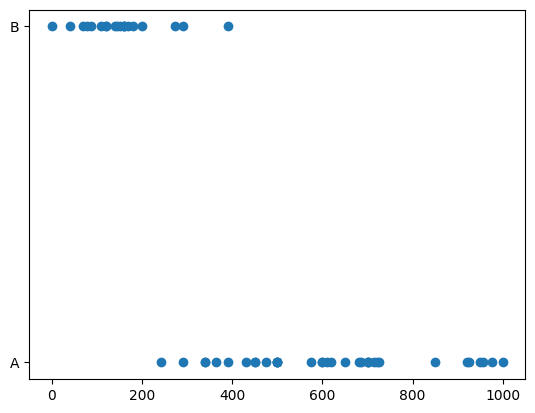

In [20]:
plt.scatter(df.Weight,df.Species)

---
### 무게와 길이가 높으면 A
### 무게와 길이가 작으면 B

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
trainDF = df[df.columns[:-1]]
targetDF = df[df.columns[-1]]

In [27]:
trainDF.shape,targetDF.shape

((55, 2), (55,))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(trainDF,targetDF,random_state=31,stratify=targetDF,test_size=0.2)

In [29]:
model = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5],'p':[1,2]}
grid = GridSearchCV(model,param_grid=params,cv=3,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2]},
             scoring='accuracy')

In [30]:
grid.best_params_ #최적의 파라미터

{'n_neighbors': 2, 'p': 1}

In [31]:
grid.best_score_

0.9523809523809524

In [32]:
grid.cv_results_

{'mean_fit_time': array([0.00197522, 0.00267855, 0.00166098, 0.00133872, 0.00133133,
        0.00166178, 0.00166202, 0.0013299 ]),
 'std_fit_time': array([0.00140458, 0.00092661, 0.00092131, 0.00046408, 0.00046918,
        0.00046968, 0.00046985, 0.00047053]),
 'mean_score_time': array([0.00298929, 0.00231735, 0.0019954 , 0.00166432, 0.00199334,
        0.0016528 , 0.00199501, 0.00232752]),
 'std_score_time': array([8.14699066e-04, 4.57434831e-04, 1.46109075e-06, 4.67773985e-04,
        2.04478587e-06, 4.63640441e-04, 4.05233662e-07, 4.71314248e-04]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2, 'p': 1},
  {'n_neighbors': 2, '

In [33]:
grid_model = grid.best_estimator_

In [38]:
y_pre = grid_model.predict(x_test)

In [40]:
accuracy_score(y_pre,y_test)

0.8181818181818182

In [41]:
y_pre

array(['B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A'],
      dtype=object)

In [42]:
grid_model.score(x_test,y_test) 모델점수

0.8181818181818182